In [1]:
from evaluation import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import os

/home/fe/hufe/miniconda3/envs/remote-sensing/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to /home/fe/hufe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/fe/hufe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
%cd ..

/home/fe/hufe/Documents/semester11/activelearning_ic


## This part is time consuming
The results get saved to a csv file which can be loaded later on

In [3]:
def get_stats(reference_paths, prediction_path):

    bleus = []
    meteors = []
    rouges = []
    percentage = []


    for i in range(len(os.listdir(prediction_path))):
        print(i)
        
        bleu, meteor, rouge = eval_validation(references_path=reference_paths, prediction_path=prediction_path + f'/{i}')

        bleus.append(bleu)
        meteors.append(meteor)
        rouges.append(rouge)
        percentage.append((i+1)*5)
    return bleus, meteors, rouges, percentage

Put every run type into a list with the paths of the different runs.

In [8]:
img_cluster = ['results/cluster_image_0/08-02-2023-12-41/val', 'results/cluster_image_1/08-02-2023-17-11/val', 'results/cluster_image_2/09-02-2023-14-17/val']
text_cluster = ['results/cluster_text_0/10-02-2023-10-33/val', 'results/cluster_text_1/10-02-2023-00-10/val', 'results/cluster_text_2/10-02-2023-00-10/val']
margin_conf = ['results/word_margin_0/val', 'results/word_margin_1/val', 'results/word_margin_2/val']
least_conf = ['results/word_conf_0/val', 'results/word_conf_1/val', 'results/word_conf_2/val']
cluster_conf = ['results/cluster+confidence_0/02-03-2023-18-15/val', 'results/cluster+confidence_1/02-03-2023-18-15/val', 'results/cluster+confidence_2/02-03-2023-18-15/val']
conf_cluster = ['results/confidence+cluster_0/02-03-2023-18-38/val', 'results/confidence+cluster_1/02-03-2023-18-38/val', 'results/confidence+cluster_2/02-03-2023-18-38/val']
random = ['results/random_0/09-02-2023-21-18/val', 'results/random_1/09-02-2023-23-37/val', 'results/random_2/09-02-2023-23-37/val']
full = 'results/full_0/08-02-2023-12-50/val'


specify which run you want to evaluate and under what name it should be saved 

In [6]:
reference_paths = [f"evaluation/val_references_{i}.txt" for i in range(5)]

In [ ]:
# THIS MAY TAKE

# HERE YOU CAN ADD YOUR RUNS
# runs = [(your_runs, 'your runs')]

# example:
runs = [
(img_cluster, 'img_cluster'),
(text_cluster, 'text_cluster'),
(margin_conf, 'margin_conf'),
(least_conf, 'least_conf'),
(cluster_conf, 'cluster_conf'),
(conf_cluster, 'conf_cluster'),
(random, 'random'),
]

with tqdm(total=len(runs)) as pbar:
    stats = []
    for experiments, method in runs:
        for experiment in experiments:
            bleu, meteor, rouge, percentage = get_stats(reference_paths, experiment)
            df = pd.DataFrame({"bleu": bleu, "meteor": meteor, "rouge": rouge, "percentage": percentage,  "method": [method]*len(bleu)})
            stats.append(df)
        pbar.update(1)


In [ ]:
# handle single full baseline differently - it doesnt have cycles, so we need to do it manually
bleu, meteor, rouge = eval_validation(references_path=reference_paths, prediction_path=full + '/0')
full_df = pd.DataFrame({"bleu": [bleu]*9, "meteor": [meteor]*9, "rouge": [rouge]*9, "percentage": [i * 5 for i in range(1,10)],  "method": 9*["full"]})

In [11]:
# concatenate all the dataframes
all = pd.concat((*stats, full_df))

In [12]:
all.to_csv('evaluation/all.csv')

In [13]:
all = pd.read_csv('evaluation/all.csv')

In [20]:
color_palette = {
    'img_cluster': 'blue',
    'text_cluster': 'green',
    'margin_conf': 'gray',
    'least_conf': 'orange',
    'cluster_conf': 'brown',
    'conf_cluster': 'cyan',
    'random': 'purple',
    'full': 'tab:pink',
}

In [15]:
all.method.unique()

array(['img_cluster', 'text_cluster', 'margin_conf', 'least_conf',
       'cluster_conf', 'conf_cluster', 'random', 'full'], dtype=object)

In [26]:
def plot(df):
    sns.set_theme(style="ticks")
    plt.figure(figsize=(30,7))

    plt.subplot(1,3,1, title='Bleu')
    sns.lineplot(data=df, x="percentage", y="bleu", hue="method", palette=color_palette)     

    plt.subplot(1,3,2, title='Rouge')
    sns.lineplot(data=df, x="percentage", y="rouge", hue="method", palette=color_palette)    

    plt.subplot(1,3,3, title='Meteor')
    sns.lineplot(data=df, x="percentage", y="meteor", hue="method", palette=color_palette) 
   

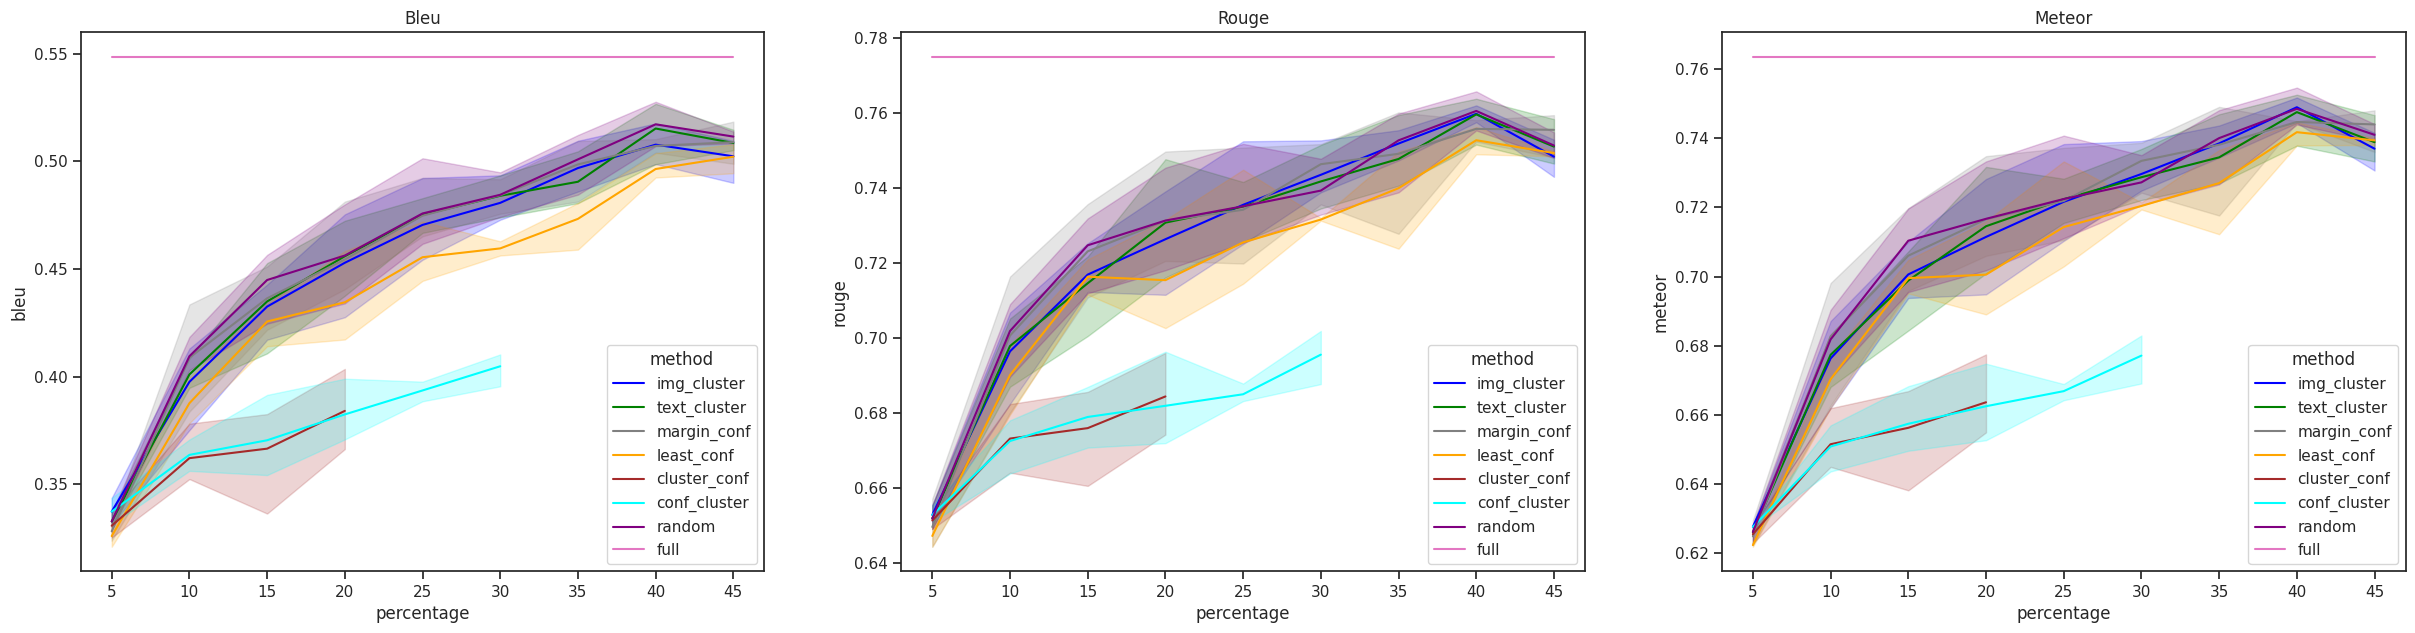

In [22]:
plot(all)

### SLIDE BASELINES

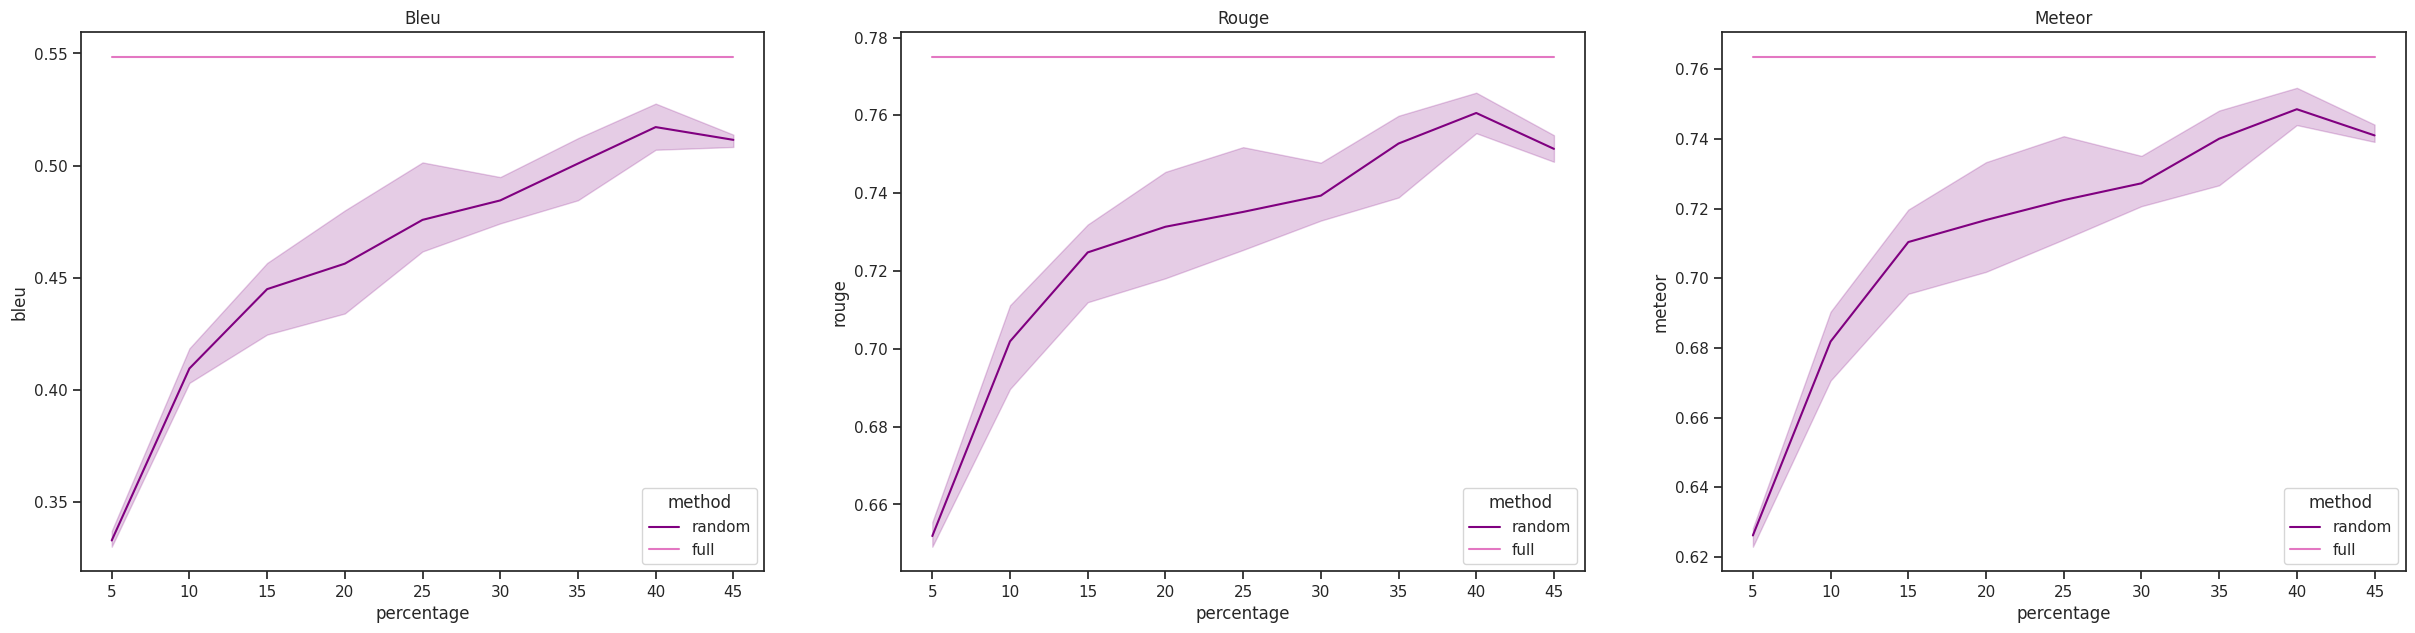

In [27]:
baselines = all[all['method'].isin(['full','random', 'MLCA-Net'])]

plot(baselines)

### SLIDE CONFIDENCE

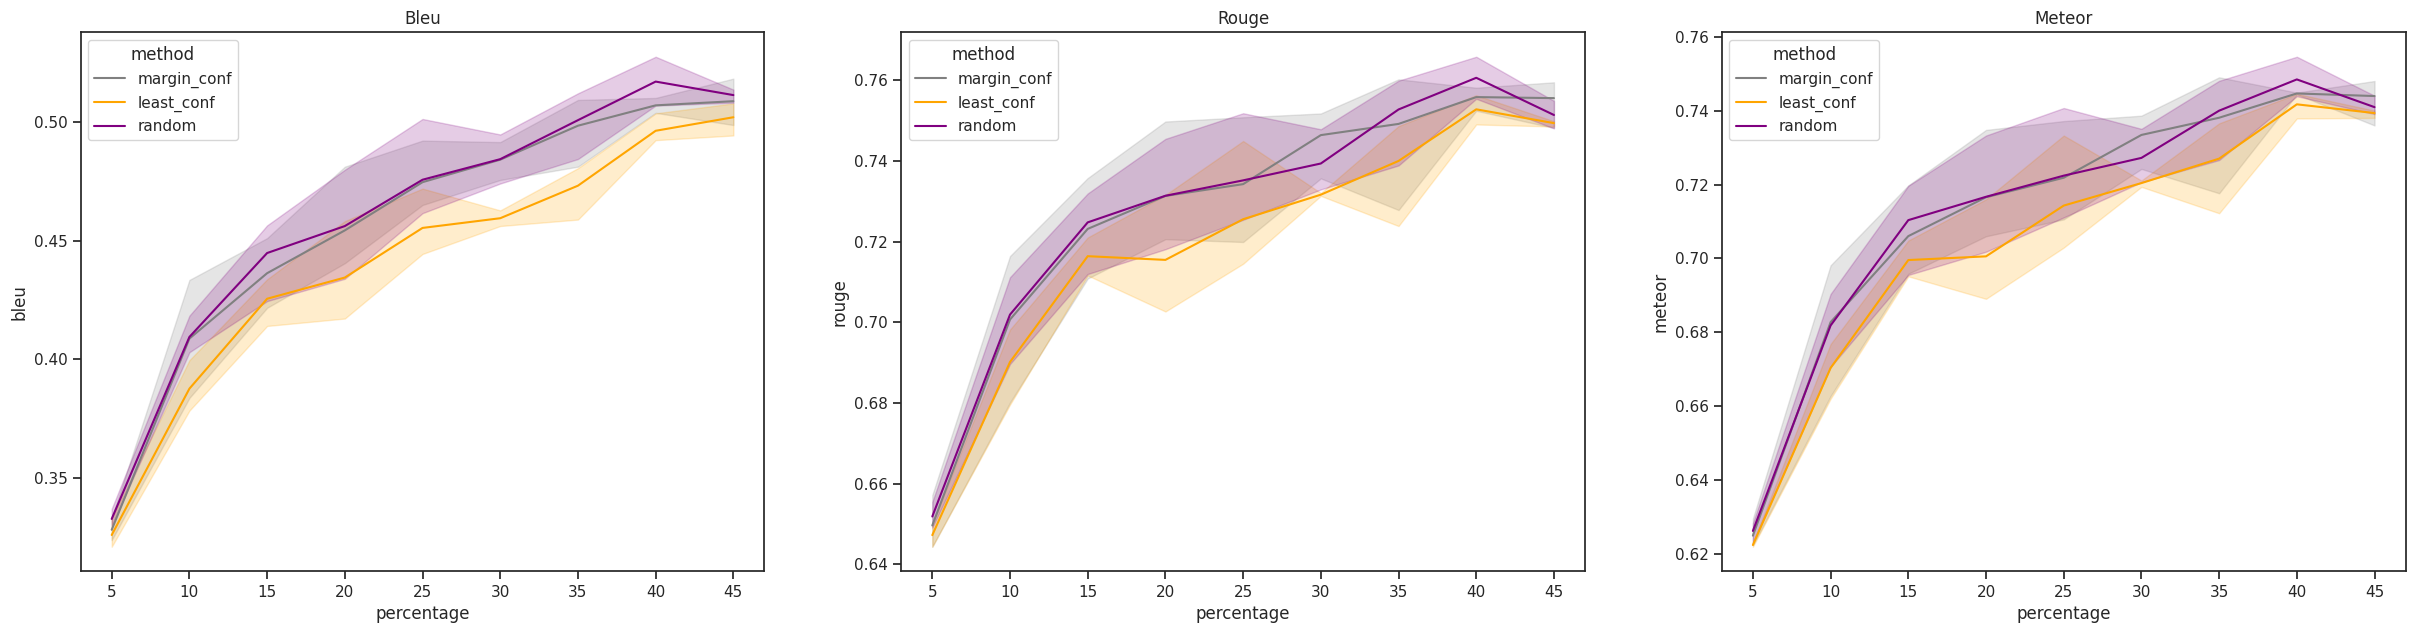

In [30]:
confidence = all[all['method'].isin(['random', 'least_conf', 'margin_conf'])]

plot(confidence)

### SLIDE CLUSTERING

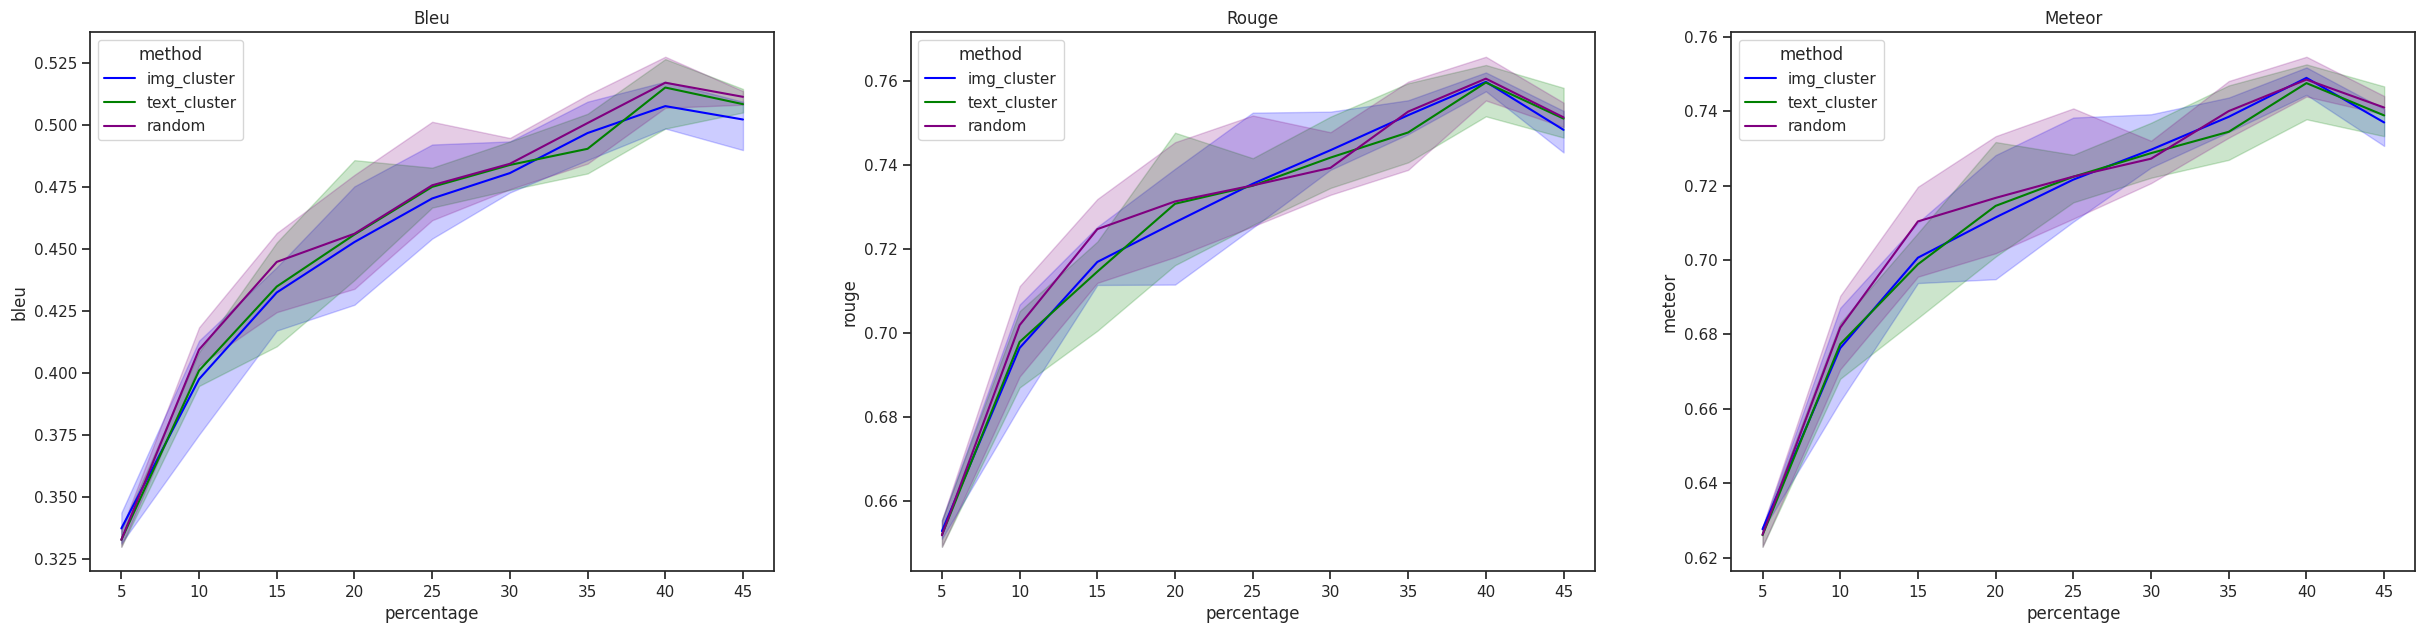

In [31]:
cluster = all[all['method'].isin(['random', 'img_cluster', 'text_cluster'])]

plot(cluster)

### SLIDE FUSION

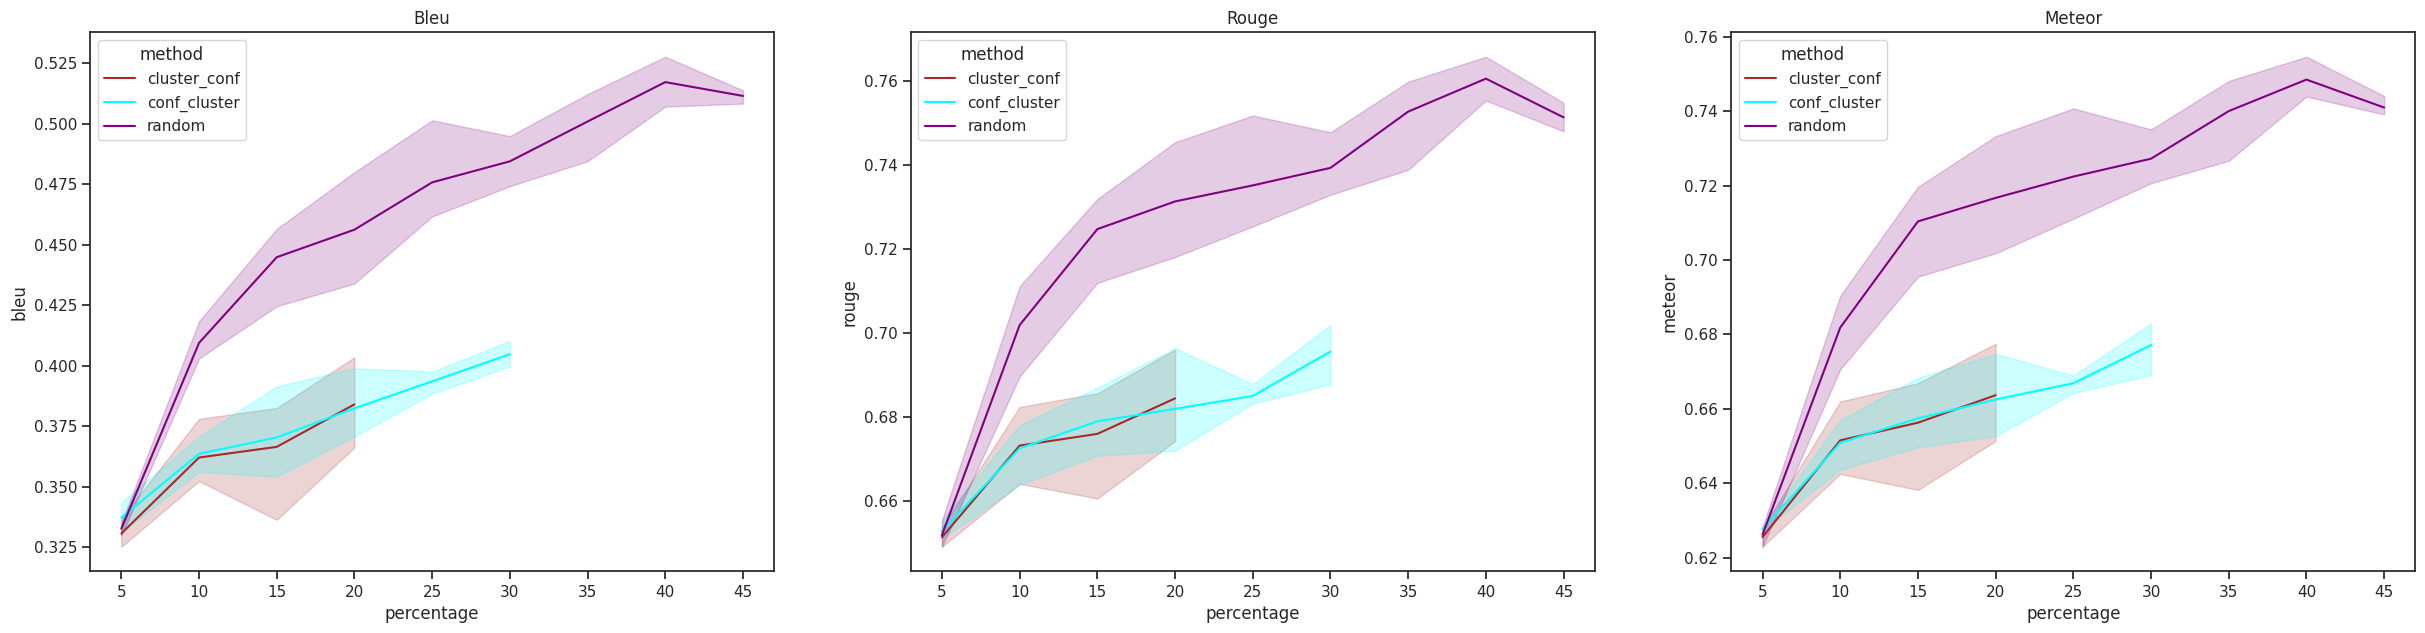

In [32]:
fusion = all[all['method'].isin(['random', 'conf_cluster', 'cluster_conf'])]

plot(fusion)

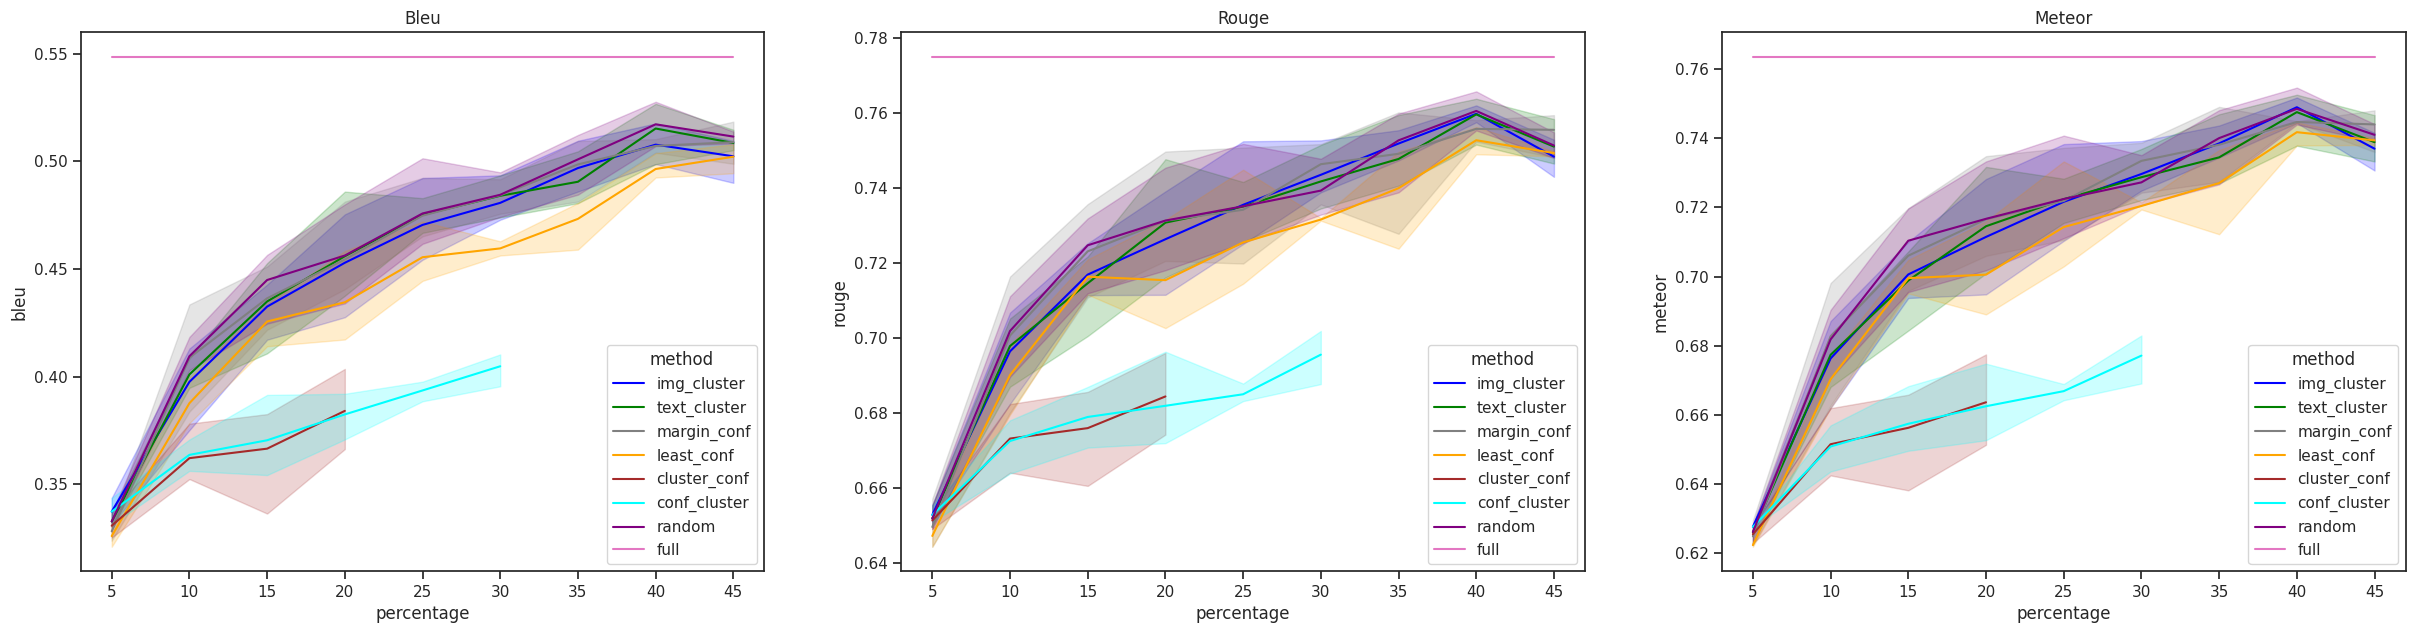

In [34]:
plot(all)